#UN BIGDATA HACKATHON

### YOUNG FERFOR - Indonesia - Binus University

- Belinda Mutiara
- Gabrielle Felicia Ariyanto
- Laurentia Alyssa Castilani
- Natasha Hartanti Winata

#Link Tableau

https://public.tableau.com/app/profile/belinda.mutiara/viz/WorldPeaceIndex2022/Dashboard1?publish=yes 

https://public.tableau.com/views/UkrainePPI/UkrainePPI?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

#Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Ukraine Producer Price Index Dataset

##Quick EDA

In [2]:
UKR_PPI = pd.read_csv("https://raw.githubusercontent.com/laurentiaalyssa/Data/main/Producer%20Prices%20data%20for%20Ukraine.csv")
UKR_PPI.head(5)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,NaN,#indicator+name,NaN,NaN,NaN,#date+year,NaN,NaN,#indicator+type,#indicator+value+num,NaN
1,UKR,1994-01-01,1994-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994,7021.0,Annual value,NaN,0.790000,I
2,UKR,1995-01-01,1995-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1995.0,1995,7021.0,Annual value,NaN,4.090000,I
3,UKR,1996-01-01,1996-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1996.0,1996,7021.0,Annual value,NaN,6.800000,I
4,UKR,1997-01-01,1997-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1997.0,1997,7021.0,Annual value,NaN,8.030000,I


In [3]:
UKR_PPI.tail(5)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
9751,UKR,2017-01-01,2017-12-31,230.0,'804,Ukraine,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2017.0,2017,7021.0,Annual value,NaN,131.640000,I
9752,UKR,2018-01-01,2018-12-31,230.0,'804,Ukraine,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2018.0,2018,7021.0,Annual value,NaN,149.190000,I
9753,UKR,2019-01-01,2019-12-31,230.0,'804,Ukraine,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2019.0,2019,7021.0,Annual value,NaN,154.420000,I
9754,UKR,2020-01-01,2020-12-31,230.0,'804,Ukraine,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2020.0,2020,7021.0,Annual value,NaN,150.510000,I
9755,UKR,2021-01-01,2021-12-31,230.0,'804,Ukraine,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2021.0,2021,7021.0,Annual value,NaN,160.570000,I


In data preparation, the first row need to be deleted, because it only contains variable description

In [4]:
UKR_PPI.columns

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item Code (CPC)', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Months Code', 'Months', 'Unit', 'Value', 'Flag'],
      dtype='object')

In data preparation, rename some columns containing spaces in variable name

In [5]:
UKR_PPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             9756 non-null   object 
 1   StartDate        9756 non-null   object 
 2   EndDate          9756 non-null   object 
 3   Area Code        9755 non-null   float64
 4   Area Code (M49)  9755 non-null   object 
 5   Area             9756 non-null   object 
 6   Item Code        9756 non-null   object 
 7   Item Code (CPC)  9755 non-null   object 
 8   Item             9756 non-null   object 
 9   Element Code     9755 non-null   float64
 10  Element          9755 non-null   object 
 11  Year Code        9755 non-null   float64
 12  Year             9756 non-null   object 
 13  Months Code      9755 non-null   float64
 14  Months           9755 non-null   object 
 15  Unit             6551 non-null   object 
 16  Value            9756 non-null   object 
 17  Flag          

From the output above it can be seen:

1. There is missing value in 'Unit' column, but it won't be a problem because we will only use the LCU unit

2. There are some columns that do not match the data type, which are 'StartDate', 'EndDate', 'Year', 'Value'

In [6]:
#Check Duplicates Value
duplicate_UKR_PPI = UKR_PPI[UKR_PPI.duplicated()]
duplicate_UKR_PPI

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag


Every records in the dataset are unique. There is no duplication in Ukraine Producer Price Index Dataset.

In [7]:
UKR_PPI['Item'].unique()

array(['#indicator+name', 'Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Barley', 'Beans, dry', 'Blueberries',
       'Broad beans and horse beans, dry',
       'Broad beans and horse beans, green', 'Buckwheat', 'Cabbages',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cereals n.e.c.',
       'Cherries', 'Chestnuts, in shell', 'Chicory roots',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cranberries', 'Cucumbers and gherkins', 'Currants',
       'Eggplants (aubergines)',
       'Eggs from other birds in shell, fresh, n.e.c.',
       'Flax, processed but not spun', 'Gooseberries', 'Grapes',
       'Green garlic', 'Hazelnuts, in shell', 'Hempseed',
       'Hen eggs in shell, fresh', 'Hop cones',
       'Horse meat, fresh or chilled',
       'Horse meat, fresh or chilled (biological)', 'Lentils, d

In [8]:
UKR_PPI['Element'].unique()

array([nan, 'Producer Price Index (2014-2016 = 100)',
       'Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)'], dtype=object)

In [9]:
UKR_PPI['Year'].unique()

array(['#date+year', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)

In [10]:
UKR_PPI['Months'].unique()

array([nan, 'Annual value', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December'], dtype=object)

In [11]:
UKR_PPI['Unit'].unique()

array(['#indicator+type', nan, 'LCU', 'SLC', 'USD'], dtype=object)

In [12]:
UKR_PPI['Flag'].unique()

array([nan, 'I', 'A'], dtype=object)

##Data Preparation

In [13]:
#Drop First Row, because the first row only contains variable description
UKR_PPI = UKR_PPI.drop(labels = 0, axis = 0)
UKR_PPI.head(5)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
1,UKR,1994-01-01,1994-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994,7021.0,Annual value,NaN,0.790000,I
2,UKR,1995-01-01,1995-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1995.0,1995,7021.0,Annual value,NaN,4.090000,I
3,UKR,1996-01-01,1996-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1996.0,1996,7021.0,Annual value,NaN,6.800000,I
4,UKR,1997-01-01,1997-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1997.0,1997,7021.0,Annual value,NaN,8.030000,I
5,UKR,1998-01-01,1998-12-31,230.0,'804,Ukraine,221,'01371,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1998.0,1998,7021.0,Annual value,NaN,9.000000,I


In [14]:
#Rename Variables
UKR_PPI.rename(columns = {'Area Code': 'AreaCode', 
                          'Area Code (M49)':'AreaCode(M49)', 
                          'Item Code': 'ItemCode', 
                          'Item Code (CPC)' : 'ItemCode(CPC)', 
                          'Element Code' : 'ElementCode', 
                          'Year Code' : 'YearCode', 
                          'Months Code' : 'MonthsCode'}, inplace = True)
UKR_PPI.columns

Index(['Iso3', 'StartDate', 'EndDate', 'AreaCode', 'AreaCode(M49)', 'Area',
       'ItemCode', 'ItemCode(CPC)', 'Item', 'ElementCode', 'Element',
       'YearCode', 'Year', 'MonthsCode', 'Months', 'Unit', 'Value', 'Flag'],
      dtype='object')

In [15]:
#Fixed Data Types
UKR_PPI['StartDate'] = pd.to_datetime(UKR_PPI['StartDate'])
UKR_PPI['EndDate'] = pd.to_datetime(UKR_PPI['EndDate'])
UKR_PPI['Year'] = UKR_PPI['Year'].astype(int)
UKR_PPI['Value'] = UKR_PPI['Value'].astype(float)
UKR_PPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9755 entries, 1 to 9755
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Iso3           9755 non-null   object        
 1   StartDate      9755 non-null   datetime64[ns]
 2   EndDate        9755 non-null   datetime64[ns]
 3   AreaCode       9755 non-null   float64       
 4   AreaCode(M49)  9755 non-null   object        
 5   Area           9755 non-null   object        
 6   ItemCode       9755 non-null   object        
 7   ItemCode(CPC)  9755 non-null   object        
 8   Item           9755 non-null   object        
 9   ElementCode    9755 non-null   float64       
 10  Element        9755 non-null   object        
 11  YearCode       9755 non-null   float64       
 12  Year           9755 non-null   int64         
 13  MonthsCode     9755 non-null   float64       
 14  Months         9755 non-null   object        
 15  Unit           6550 n

In [16]:
#Select the column to be used in the analysis
UKR_PPI = UKR_PPI.drop(columns = ['Iso3', 'AreaCode', 'AreaCode(M49)', 'ItemCode', 'ItemCode(CPC)', 'YearCode', 'MonthsCode'])
UKR_PPI.head(5)

,StartDate,EndDate,Area,Item,ElementCode,Element,Year,Months,Unit,Value,Flag
1,1994-01-01,1994-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1994,Annual value,NaN,0.79,I
2,1995-01-01,1995-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1995,Annual value,NaN,4.09,I
3,1996-01-01,1996-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1996,Annual value,NaN,6.80,I
4,1997-01-01,1997-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1997,Annual value,NaN,8.03,I
5,1998-01-01,1998-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),1998,Annual value,NaN,9.00,I


In [17]:
#Filter data from 2000 and use only Annual value
UKR_PPI = UKR_PPI.loc[(UKR_PPI['Year'] >= 2000) & (UKR_PPI['Months'] == 'Annual value')]
UKR_PPI.head(5)

,StartDate,EndDate,Area,Item,ElementCode,Element,Year,Months,Unit,Value,Flag
7,2000-01-01,2000-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),2000,Annual value,NaN,14.11,I
8,2001-01-01,2001-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),2001,Annual value,NaN,15.52,I
9,2002-01-01,2002-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),2002,Annual value,NaN,16.31,I
10,2003-01-01,2003-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),2003,Annual value,NaN,19.68,I
11,2004-01-01,2004-12-31,Ukraine,"Almonds, in shell",5539.0,Producer Price Index (2014-2016 = 100),2004,Annual value,NaN,20.74,I


We decided to use 2000 as the starting year for all dataset and use only Annual value to see the development of Producer Price Index from year to year.

In [18]:
UKR_PPI['Element'].unique()

array(['Producer Price Index (2014-2016 = 100)',
       'Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)'], dtype=object)

In [19]:
UKR_PPI['Unit'].unique()

array([nan, 'LCU', 'SLC', 'USD'], dtype=object)

In [20]:
#Select only LCU (Local Currency Units)

UKR_PPI_LCU = UKR_PPI.loc[(UKR_PPI['Unit'] == 'LCU')]
UKR_PPI_LCU.head(5)

,StartDate,EndDate,Area,Item,ElementCode,Element,Year,Months,Unit,Value,Flag
63,2000-01-01,2000-12-31,Ukraine,Apples,5530.0,Producer Price (LCU/tonne),2000,Annual value,LCU,306.0,A
64,2001-01-01,2001-12-31,Ukraine,Apples,5530.0,Producer Price (LCU/tonne),2001,Annual value,LCU,436.0,A
65,2002-01-01,2002-12-31,Ukraine,Apples,5530.0,Producer Price (LCU/tonne),2002,Annual value,LCU,376.0,A
66,2003-01-01,2003-12-31,Ukraine,Apples,5530.0,Producer Price (LCU/tonne),2003,Annual value,LCU,304.0,A
67,2004-01-01,2004-12-31,Ukraine,Apples,5530.0,Producer Price (LCU/tonne),2004,Annual value,LCU,561.0,A


In [21]:
#Select only SLC (Standard Local Currency Units)

UKR_PPI_SLC = UKR_PPI.loc[(UKR_PPI['Unit'] == 'SLC')]
UKR_PPI_SLC.head(5)

,StartDate,EndDate,Area,Item,ElementCode,Element,Year,Months,Unit,Value,Flag
90,2000-01-01,2000-12-31,Ukraine,Apples,5531.0,Producer Price (SLC/tonne),2000,Annual value,SLC,306.0,A
91,2001-01-01,2001-12-31,Ukraine,Apples,5531.0,Producer Price (SLC/tonne),2001,Annual value,SLC,436.0,A
92,2002-01-01,2002-12-31,Ukraine,Apples,5531.0,Producer Price (SLC/tonne),2002,Annual value,SLC,376.0,A
93,2003-01-01,2003-12-31,Ukraine,Apples,5531.0,Producer Price (SLC/tonne),2003,Annual value,SLC,304.0,A
94,2004-01-01,2004-12-31,Ukraine,Apples,5531.0,Producer Price (SLC/tonne),2004,Annual value,SLC,561.0,A


In [22]:
#Select only USD (United States Dollar)

UKR_PPI_USD = UKR_PPI.loc[(UKR_PPI['Unit'] == 'USD')]
UKR_PPI_USD.head(5)

,StartDate,EndDate,Area,Item,ElementCode,Element,Year,Months,Unit,Value,Flag
117,2000-01-01,2000-12-31,Ukraine,Apples,5532.0,Producer Price (USD/tonne),2000,Annual value,USD,56.2,A
118,2001-01-01,2001-12-31,Ukraine,Apples,5532.0,Producer Price (USD/tonne),2001,Annual value,USD,81.2,A
119,2002-01-01,2002-12-31,Ukraine,Apples,5532.0,Producer Price (USD/tonne),2002,Annual value,USD,70.6,A
120,2003-01-01,2003-12-31,Ukraine,Apples,5532.0,Producer Price (USD/tonne),2003,Annual value,USD,57.0,A
121,2004-01-01,2004-12-31,Ukraine,Apples,5532.0,Producer Price (USD/tonne),2004,Annual value,USD,105.5,A


##Visualization

Link Tableau : 
https://public.tableau.com/views/UkrainePPI/UkrainePPI?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

#Ukraine Customer Price Index Dataset

##Quick EDA

##### First step, importing the dataset from the url for easy access to everyone and showing some of the first rows

In [23]:
#Showing Ukraine CPI Dataset
UKR_CPI = pd.read_csv("https://raw.githubusercontent.com/laurentiaalyssa/Data/main/Consumer%20Price%20Indices%20data%20for%20Ukraine.csv")

UKR_CPI.head(6)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Months Code,Months,Year Code,Year,Unit,Value,Flag,Note
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN,NaN
1,UKR,2000-01-01,2000-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2000.0,2000,NaN,19.586001,I,base year is 2015
2,UKR,2001-01-01,2001-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2001.0,2001,NaN,23.565986,I,base year is 2015
3,UKR,2002-01-01,2002-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2002.0,2002,NaN,24.766656,I,base year is 2015
4,UKR,2003-01-01,2003-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2003.0,2003,NaN,24.766656,I,base year is 2015
5,UKR,2004-01-01,2004-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2004.0,2004,NaN,26.644501,I,base year is 2015


In [24]:
UKR_CPI.tail(5)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Months Code,Months,Year Code,Year,Unit,Value,Flag,Note
794,UKR,2017-12-01,2017-12-31,230.0,'804,Ukraine,23014,Food price inflation,7012.0,December,2017.0,2017,%,17.722222,E,NaN
795,UKR,2018-12-01,2018-12-31,230.0,'804,Ukraine,23014,Food price inflation,7012.0,December,2018.0,2018,%,7.786692,E,NaN
796,UKR,2019-12-01,2019-12-31,230.0,'804,Ukraine,23014,Food price inflation,7012.0,December,2019.0,2019,%,4.772329,E,NaN
797,UKR,2020-12-01,2020-12-31,230.0,'804,Ukraine,23014,Food price inflation,7012.0,December,2020.0,2020,%,4.931049,E,NaN
798,UKR,2021-12-01,2021-12-31,230.0,'804,Ukraine,23014,Food price inflation,7012.0,December,2021.0,2021,%,12.743927,E,NaN


##### Clear view of the datasets variable

In [25]:
#CPI's Variabel

UKR_CPI.columns

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item', 'Months Code', 'Months', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

In [26]:
UKR_CPI.shape

(799, 16)

In [27]:
UKR_CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             799 non-null    object 
 1   StartDate        799 non-null    object 
 2   EndDate          799 non-null    object 
 3   Area Code        798 non-null    float64
 4   Area Code (M49)  798 non-null    object 
 5   Area             799 non-null    object 
 6   Item Code        799 non-null    object 
 7   Item             799 non-null    object 
 8   Months Code      798 non-null    float64
 9   Months           798 non-null    object 
 10  Year Code        798 non-null    float64
 11  Year             799 non-null    object 
 12  Unit             259 non-null    object 
 13  Value            799 non-null    object 
 14  Flag             798 non-null    object 
 15  Note             540 non-null    object 
dtypes: float64(3), object(13)
memory usage: 100.0+ KB


In [28]:
#Check Duplicates Value

duplicate_UKR_CPI = UKR_CPI[UKR_CPI.duplicated()]
duplicate_UKR_CPI

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Months Code,Months,Year Code,Year,Unit,Value,Flag,Note


In [29]:
UKR_CPI["Iso3"].unique()

array(['#country+code', 'UKR'], dtype=object)

In [30]:
np.sum(len(UKR_CPI["StartDate"].unique()))

271

In [31]:
UKR_CPI["EndDate"].unique()

array(['#date+end', '2000-01-31', '2001-01-31', '2002-01-31',
       '2003-01-31', '2004-01-31', '2005-01-31', '2006-01-31',
       '2007-01-31', '2008-01-31', '2009-01-31', '2010-01-31',
       '2011-01-31', '2012-01-31', '2013-01-31', '2014-01-31',
       '2015-01-31', '2016-01-31', '2017-01-31', '2018-01-31',
       '2019-01-31', '2020-01-31', '2021-01-31', '2022-01-31',
       '2000-02-29', '2001-02-28', '2002-02-28', '2003-02-28',
       '2004-02-29', '2005-02-28', '2006-02-28', '2007-02-28',
       '2008-02-29', '2009-02-28', '2010-02-28', '2011-02-28',
       '2012-02-29', '2013-02-28', '2014-02-28', '2015-02-28',
       '2016-02-29', '2017-02-28', '2018-02-28', '2019-02-28',
       '2020-02-29', '2021-02-28', '2022-02-28', '2000-03-31',
       '2001-03-31', '2002-03-31', '2003-03-31', '2004-03-31',
       '2005-03-31', '2006-03-31', '2007-03-31', '2008-03-31',
       '2009-03-31', '2010-03-31', '2011-03-31', '2012-03-31',
       '2013-03-31', '2014-03-31', '2015-03-31', '2016-0

In [32]:
UKR_CPI["Area Code"].unique()

array([ nan, 230.])

In [33]:
UKR_CPI["Area Code (M49)"].unique()

array([nan, "'804"], dtype=object)

In [34]:
UKR_CPI["Area"].unique()

array(['#country+name', 'Ukraine'], dtype=object)

In [35]:
UKR_CPI["Item Code"].unique()

array(['#indicator+code', '23013', '23012', '23014'], dtype=object)

In [36]:
UKR_CPI["Item"].unique()

array(['#indicator+name', 'Consumer Prices, Food Indices (2015 = 100)',
       'Consumer Prices, General Indices (2015 = 100)',
       'Food price inflation'], dtype=object)

In [37]:
UKR_CPI["Months Code"].unique()

array([  nan, 7001., 7002., 7003., 7004., 7005., 7006., 7007., 7008.,
       7009., 7010., 7011., 7012.])

In [38]:
UKR_CPI["Months"].unique()

array([nan, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [39]:
UKR_CPI["Year Code"].unique()

array([  nan, 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2022.])

In [40]:
UKR_CPI["Year"].unique()

array(['#date+year', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype=object)

In [41]:
UKR_CPI["Unit"].unique()

array(['#indicator+type', nan, '%'], dtype=object)

In [42]:
np.sum(len(UKR_CPI["Value"].unique()))

714

In [43]:
UKR_CPI["Flag"].unique()

array([nan, 'I', 'X', 'A', 'E'], dtype=object)

In [44]:
UKR_CPI["Note"].unique()

array([nan, 'base year is 2015'], dtype=object)

##Data Preparation

##### Dropping the variables and rows that are not needed

In [45]:
#Drop First Row, because the first row only contains variable description
UKR_CPI = UKR_CPI.drop(labels = 0, axis = 0)
UKR_CPI.head(6)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item,Months Code,Months,Year Code,Year,Unit,Value,Flag,Note
1,UKR,2000-01-01,2000-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2000.0,2000,NaN,19.586001,I,base year is 2015
2,UKR,2001-01-01,2001-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2001.0,2001,NaN,23.565986,I,base year is 2015
3,UKR,2002-01-01,2002-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2002.0,2002,NaN,24.766656,I,base year is 2015
4,UKR,2003-01-01,2003-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2003.0,2003,NaN,24.766656,I,base year is 2015
5,UKR,2004-01-01,2004-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2004.0,2004,NaN,26.644501,I,base year is 2015
6,UKR,2005-01-01,2005-01-31,230.0,'804,Ukraine,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2005.0,2005,NaN,29.643633,X,base year is 2015


In [46]:
#Fixed Data 

UKR_CPI["Value"] = UKR_CPI["Value"].astype('float64') 

UKR_CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 1 to 798
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             798 non-null    object 
 1   StartDate        798 non-null    object 
 2   EndDate          798 non-null    object 
 3   Area Code        798 non-null    float64
 4   Area Code (M49)  798 non-null    object 
 5   Area             798 non-null    object 
 6   Item Code        798 non-null    object 
 7   Item             798 non-null    object 
 8   Months Code      798 non-null    float64
 9   Months           798 non-null    object 
 10  Year Code        798 non-null    float64
 11  Year             798 non-null    object 
 12  Unit             258 non-null    object 
 13  Value            798 non-null    float64
 14  Flag             798 non-null    object 
 15  Note             540 non-null    object 
dtypes: float64(4), object(12)
memory usage: 106.0+ KB


##### Creating the dataset with the chosen variables

In [47]:
#Select the column to be used in the analysis

UKR_CPI_Chosen = pd.DataFrame(UKR_CPI[['Year', 'Value', 'Item']])
UKR_CPI_Chosen

,Year,Value,Item
1,2000,19.586001,"Consumer Prices, Food Indices (2015 = 100)"
2,2001,23.565986,"Consumer Prices, Food Indices (2015 = 100)"
3,2002,24.766656,"Consumer Prices, Food Indices (2015 = 100)"
4,2003,24.766656,"Consumer Prices, Food Indices (2015 = 100)"
5,2004,26.644501,"Consumer Prices, Food Indices (2015 = 100)"
...,...,...,...
794,2017,17.722222,Food price inflation
795,2018,7.786692,Food price inflation
796,2019,4.772329,Food price inflation
797,2020,4.931049,Food price inflation


Reasoning for variables removal:
- Iso3: This dataset focuses only in Ukraine so there is no need for Ukraine's Iso3
- StartDate, EndDate, Months Code, Months: We will focuses to the growth each year in Ukraine's CPI and not monthly.
- Area Code, Area Code(M49), Area: All of the data is located in Ukraine so these variables has the same values in each rows
- Unit, Flag, and Note: only helps us to understand the dataset while reading it.
- Item code and Year Code: It will be used if we need the data type factor of "Item" and "Year"

#### Choosing Variables for analyzing

Reasoning for chosen variables:
- Year: We're going to group our data by years, by searching its' mean.
- Item: We need to know what is being represented by the percentage we got.
- Value: Contains the CPI data we need



In [48]:
#Adding the data for the new variable

UKR_CPI_Chosen['Mean_Value'] = UKR_CPI_Chosen.groupby(['Year', 'Item'], sort=False)['Value'].transform('mean')

UKR_CPI_Chosen

,Year,Value,Item,Mean_Value
1,2000,19.586001,"Consumer Prices, Food Indices (2015 = 100)",21.518124
2,2001,23.565986,"Consumer Prices, Food Indices (2015 = 100)",23.946350
3,2002,24.766656,"Consumer Prices, Food Indices (2015 = 100)",24.076159
4,2003,24.766656,"Consumer Prices, Food Indices (2015 = 100)",25.303444
5,2004,26.644501,"Consumer Prices, Food Indices (2015 = 100)",27.500946
...,...,...,...,...
794,2017,17.722222,Food price inflation,12.906168
795,2018,7.786692,Food price inflation,11.344656
796,2019,4.772329,Food price inflation,8.017908
797,2020,4.931049,Food price inflation,2.746711


Reasoning for adding new variables:
- Mean_Value: To give the ease in processing the data, by displaying the mean CPI in that year, in each categories

In [49]:
#Drop Value Column
#We don't need the variable "Value" anymore as the value we want to display is the mean of each year and not the value of each months.

UKR_CPI_Chosen.drop(columns = ['Value'], inplace = True)
UKR_CPI_Chosen

,Year,Item,Mean_Value
1,2000,"Consumer Prices, Food Indices (2015 = 100)",21.518124
2,2001,"Consumer Prices, Food Indices (2015 = 100)",23.946350
3,2002,"Consumer Prices, Food Indices (2015 = 100)",24.076159
4,2003,"Consumer Prices, Food Indices (2015 = 100)",25.303444
5,2004,"Consumer Prices, Food Indices (2015 = 100)",27.500946
...,...,...,...
794,2017,Food price inflation,12.906168
795,2018,Food price inflation,11.344656
796,2019,Food price inflation,8.017908
797,2020,Food price inflation,2.746711


In [50]:
#Drop duplicates value
#As we have already remove the variable "Value" which contains the CPI of each month respectively and we are not using the value based on months rather based on years (using the mean), meaning that the rows that
# are in the same year and same item category will have duplicated attributes. Therefore, to clean the dataset, we would need to remove the duplicated rows.

UKR_CPI_Final = UKR_CPI_Chosen.drop_duplicates()
UKR_CPI_Final

,Year,Item,Mean_Value
1,2000,"Consumer Prices, Food Indices (2015 = 100)",21.518124
2,2001,"Consumer Prices, Food Indices (2015 = 100)",23.946350
3,2002,"Consumer Prices, Food Indices (2015 = 100)",24.076159
4,2003,"Consumer Prices, Food Indices (2015 = 100)",25.303444
5,2004,"Consumer Prices, Food Indices (2015 = 100)",27.500946
...,...,...,...
558,2018,Food price inflation,11.344656
559,2019,Food price inflation,8.017908
560,2020,Food price inflation,2.746711
561,2021,Food price inflation,10.784551


####Final Dataset

In [51]:
#To make the item variabels
UKR_CPI_Final = UKR_CPI_Final.pivot(index= 'Year', columns='Item', values='Mean_Value')
UKR_CPI_Final

Item,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
Year,,,
2000,21.518124,19.420949,NaN
2001,23.946350,21.740145,11.501460
2002,24.076159,21.902489,0.546283
2003,25.303444,23.048172,5.152437
2004,27.500946,25.135448,8.682911
2005,30.977389,28.502921,12.671689
2006,32.622527,31.081867,5.354994
2007,35.767493,35.070885,9.688284
2008,48.534183,43.920938,36.072180


In [52]:
UKR_CPI_Final.columns

Index(['Consumer Prices, Food Indices (2015 = 100)',
       'Consumer Prices, General Indices (2015 = 100)',
       'Food price inflation'],
      dtype='object', name='Item')

In [53]:
UKR_CPI_Final = UKR_CPI_Final.reset_index()
UKR_CPI_Final

Item,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,2000,21.518124,19.420949,NaN
1,2001,23.946350,21.740145,11.501460
2,2002,24.076159,21.902489,0.546283
3,2003,25.303444,23.048172,5.152437
4,2004,27.500946,25.135448,8.682911
5,2005,30.977389,28.502921,12.671689
6,2006,32.622527,31.081867,5.354994
7,2007,35.767493,35.070885,9.688284
8,2008,48.534183,43.920938,36.072180
9,2009,54.331091,50.892441,12.178234


In [54]:
#It's clearly seen that the data in  is NaN

UKR_CPI_Final['Food price inflation'].replace([np.nan], 0, inplace=True)
UKR_CPI_Final

Item,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,2000,21.518124,19.420949,0.000000
1,2001,23.946350,21.740145,11.501460
2,2002,24.076159,21.902489,0.546283
3,2003,25.303444,23.048172,5.152437
4,2004,27.500946,25.135448,8.682911
5,2005,30.977389,28.502921,12.671689
6,2006,32.622527,31.081867,5.354994
7,2007,35.767493,35.070885,9.688284
8,2008,48.534183,43.920938,36.072180
9,2009,54.331091,50.892441,12.178234


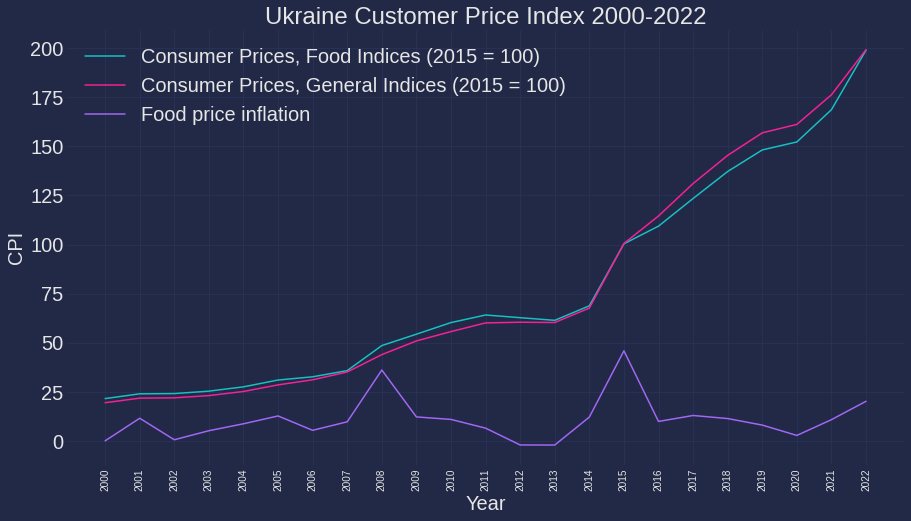

In [55]:
plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

x = UKR_CPI_Final["Year"]
y1 = UKR_CPI_Final["Consumer Prices, Food Indices (2015 = 100)"]
y2 = UKR_CPI_Final["Consumer Prices, General Indices (2015 = 100)"]
y3 = UKR_CPI_Final["Food price inflation"]
plt.plot(x, y1, label= "Consumer Prices, Food Indices (2015 = 100)")
plt.plot(x, y2, label= "Consumer Prices, General Indices (2015 = 100)")
plt.plot(x, y3, label= "Food price inflation")
plt.title("Ukraine Customer Price Index 2000-2022")
plt.xlabel("Year", fontsize=20)
plt.ylabel("CPI")
plt.gcf().set_size_inches(15, 8)
plt.xticks(size = 10, rotation = 90)
plt.legend()
plt.show()

#Ukraine Inflation Rate

##Quick EDA

In [56]:
UKR_INF = pd.read_csv("https://raw.githubusercontent.com/laurentiaalyssa/Data/main/INFLATION_UKR.csv", sep=';')
UKR_INF.head(5)

,Year,Inflation rate
0,2000,25.8
1,2001,6.1
2,2002,-0.6
3,2003,8.2
4,2004,12.3


In [57]:
UKR_INF.tail(5)

,Year,Inflation rate
18,2018,9.8
19,2019,4.1
20,2020,5.0
21,2021,10.0
22,2022,30.0


In [58]:
UKR_INF.columns

Index(['Year', 'Inflation rate'], dtype='object')

In [59]:
UKR_INF.shape

(23, 2)

In [60]:
UKR_INF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            23 non-null     int64  
 1   Inflation rate  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


Unique Values

In [61]:
UKR_INF["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [62]:
UKR_INF["Inflation rate"].unique()

array([25.8,  6.1, -0.6,  8.2, 12.3, 10.3, 11.6, 16.6, 22.3,  9.1,  4.6,
       -0.2,  0.5, 24.9, 43.3, 12.4, 13.7,  9.8,  4.1,  5. , 10. , 30. ])

##Visualization

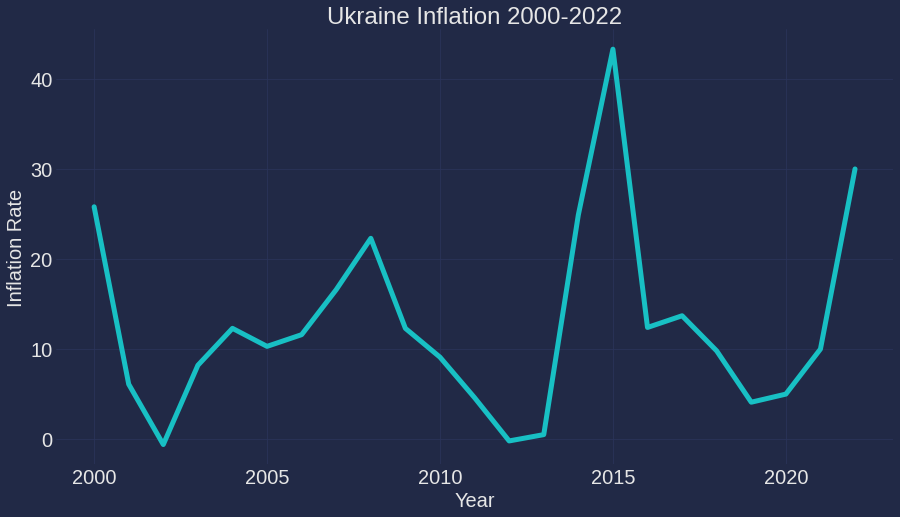

In [63]:
plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.plot(UKR_INF['Year'], UKR_INF['Inflation rate'], linewidth=5)
plt.title("Ukraine Inflation 2000-2022")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Inflation Rate")
plt.gcf().set_size_inches(15, 8)

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

#Ukraine Exchange Rate Dataset

##Quick EDA

In [64]:
UKR_ER = pd.read_csv( "https://raw.githubusercontent.com/laurentiaalyssa/Data/main/Exchange%20rates%20data%20for%20Ukraine.csv")

In [65]:
UKR_ER.head(5)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Element Code,Element,ISO Currency Code,Currency,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,NaN,NaN,NaN,NaN,NaN,#date+year,NaN,NaN,#indicator+type,#indicator+value+num,NaN
1,UKR,1996-02-01,1996-02-29,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7002.0,February,NaN,1.881034500000,X
2,UKR,1996-03-01,1996-03-31,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7003.0,March,NaN,1.891516100000,X
3,UKR,1996-04-01,1996-04-30,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7004.0,April,NaN,1.872666700000,X
4,UKR,1996-05-01,1996-05-31,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7005.0,May,NaN,1.841900000000,X


In [66]:
UKR_ER.tail(5)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Element Code,Element,ISO Currency Code,Currency,Year Code,Year,Months Code,Months,Unit,Value,Flag
374,UKR,2017-01-01,2017-12-31,230.0,'804,Ukraine,SLC,Standard local currency units per USD,UAH,Hryvnia,2017.0,2017,7021.0,Annual value,NaN,26.596606300000,X
375,UKR,2018-01-01,2018-12-31,230.0,'804,Ukraine,SLC,Standard local currency units per USD,UAH,Hryvnia,2018.0,2018,7021.0,Annual value,NaN,27.200492333300,X
376,UKR,2019-01-01,2019-12-31,230.0,'804,Ukraine,SLC,Standard local currency units per USD,UAH,Hryvnia,2019.0,2019,7021.0,Annual value,NaN,25.845589333300,X
377,UKR,2020-01-01,2020-12-31,230.0,'804,Ukraine,SLC,Standard local currency units per USD,UAH,Hryvnia,2020.0,2020,7021.0,Annual value,NaN,26.957524383300,X
378,UKR,2021-01-01,2021-12-31,230.0,'804,Ukraine,SLC,Standard local currency units per USD,UAH,Hryvnia,2021.0,2021,7021.0,Annual value,NaN,27.286189383300,X


In [67]:
UKR_ER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Iso3               379 non-null    object 
 1   StartDate          379 non-null    object 
 2   EndDate            379 non-null    object 
 3   Area Code          378 non-null    float64
 4   Area Code (M49)    378 non-null    object 
 5   Area               379 non-null    object 
 6   Element Code       378 non-null    object 
 7   Element            378 non-null    object 
 8   ISO Currency Code  378 non-null    object 
 9   Currency           378 non-null    object 
 10  Year Code          378 non-null    float64
 11  Year               379 non-null    object 
 12  Months Code        378 non-null    float64
 13  Months             378 non-null    object 
 14  Unit               1 non-null      object 
 15  Value              379 non-null    object 
 16  Flag               378 non

From the data above we can see:
1. The first line contains the data description, we don't want that so in the next step we will discard the first line.
2. The missing value in the Area Code, Area Code(M49), Element Code, Element, ISO Currency Code, Months Code, Months, and Flag columns is caused by the presence of the first row, so that after the first row is deleted, the missing value will be disappear.
3. In the unit column there is only 1 data that is filled in, the first row, so we will discard the unit column in the next step.
4. There are two types of data: string and float
5. Some attributes do not have the appropriate data type, for example start date and end date are still in the form of strings, in the next stage we will change the data type to date data type, as well as other attributes that do not have the appropriate data type.

In [68]:
duplicate_ukrER = UKR_ER[UKR_ER.duplicated()]
duplicate_ukrER

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Element Code,Element,ISO Currency Code,Currency,Year Code,Year,Months Code,Months,Unit,Value,Flag


There is no duplication in Ukraine Exchange Rate dataset

##Data Preparation

In [69]:
#drop first row
UKR_ER = UKR_ER.drop(labels = 0, axis = 0)
UKR_ER.head(3)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Element Code,Element,ISO Currency Code,Currency,Year Code,Year,Months Code,Months,Unit,Value,Flag
1,UKR,1996-02-01,1996-02-29,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7002.0,February,NaN,1.881034500000,X
2,UKR,1996-03-01,1996-03-31,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7003.0,March,NaN,1.891516100000,X
3,UKR,1996-04-01,1996-04-30,230.0,'804,Ukraine,LCU,Local currency units per USD,UAH,Hryvnia,1996.0,1996,7004.0,April,NaN,1.872666700000,X


In [70]:
#Select the column to be used in the analysis
UKR_ER = UKR_ER.drop(columns = ['Iso3', 'Area Code', 'Area Code (M49)', 'Unit', 'Months Code', 'Year Code', 'ISO Currency Code' ])
UKR_ER.head(5)

,StartDate,EndDate,Area,Element Code,Element,Currency,Year,Months,Value,Flag
1,1996-02-01,1996-02-29,Ukraine,LCU,Local currency units per USD,Hryvnia,1996,February,1.881034500000,X
2,1996-03-01,1996-03-31,Ukraine,LCU,Local currency units per USD,Hryvnia,1996,March,1.891516100000,X
3,1996-04-01,1996-04-30,Ukraine,LCU,Local currency units per USD,Hryvnia,1996,April,1.872666700000,X
4,1996-05-01,1996-05-31,Ukraine,LCU,Local currency units per USD,Hryvnia,1996,May,1.841900000000,X
5,1996-06-01,1996-06-30,Ukraine,LCU,Local currency units per USD,Hryvnia,1996,June,1.819766700000,X


In [71]:
# Fixed data type
UKR_ER['Value'] = UKR_ER['Value'].astype(float)
UKR_ER['StartDate'] = pd.to_datetime(UKR_ER['StartDate'])
UKR_ER['EndDate'] = pd.to_datetime(UKR_ER['EndDate'])
UKR_ER['Year'] = UKR_ER['Year'].astype(int)
UKR_ER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 1 to 378
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   StartDate     378 non-null    datetime64[ns]
 1   EndDate       378 non-null    datetime64[ns]
 2   Area          378 non-null    object        
 3   Element Code  378 non-null    object        
 4   Element       378 non-null    object        
 5   Currency      378 non-null    object        
 6   Year          378 non-null    int64         
 7   Months        378 non-null    object        
 8   Value         378 non-null    float64       
 9   Flag          378 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 32.5+ KB


In [72]:
#Filter data from 2000
UKR_ER = UKR_ER.loc[(UKR_ER['Year'] >= 2000)]
UKR_ER

,StartDate,EndDate,Area,Element Code,Element,Currency,Year,Months,Value,Flag
51,2000-01-01,2000-12-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2000,Annual value,5.440233,X
52,2000-01-01,2000-01-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2000,January,5.381100,X
53,2000-02-01,2000-02-29,Ukraine,LCU,Local currency units per USD,Hryvnia,2000,February,5.543100,X
54,2000-03-01,2000-03-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2000,March,5.468000,X
55,2000-04-01,2000-04-30,Ukraine,LCU,Local currency units per USD,Hryvnia,2000,April,5.422800,X
...,...,...,...,...,...,...,...,...,...,...
374,2017-01-01,2017-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2017,Annual value,26.596606,X
375,2018-01-01,2018-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2018,Annual value,27.200492,X
376,2019-01-01,2019-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2019,Annual value,25.845589,X
377,2020-01-01,2020-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2020,Annual value,26.957524,X


We will choose 2000 as the starting year for all dataset.

In [73]:
UKR_ER['Element'].unique()

array(['Local currency units per USD',
       'Standard local currency units per USD'], dtype=object)

In [74]:
UKR_ER['Element Code'].unique()

array(['LCU', 'SLC'], dtype=object)

In [75]:
#Select only annual value LCU (Local Currency Units)

UKR_ER_LCU = UKR_ER.loc[(UKR_ER['Months'] == 'Annual value') & (UKR_ER['Element Code'] == 'LCU')  ]
UKR_ER_LCU.head()

,StartDate,EndDate,Area,Element Code,Element,Currency,Year,Months,Value,Flag
51,2000-01-01,2000-12-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2000,Annual value,5.440233,X
64,2001-01-01,2001-12-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2001,Annual value,5.372158,X
77,2002-01-01,2002-12-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2002,Annual value,5.326625,X
90,2003-01-01,2003-12-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2003,Annual value,5.332688,X
103,2004-01-01,2004-12-31,Ukraine,LCU,Local currency units per USD,Hryvnia,2004,Annual value,5.319181,X


In [76]:
#Select only annual value SLC (Standard Local Currency)
UKR_ER_SLC = UKR_ER.loc[(UKR_ER['Months'] == 'Annual value') & (UKR_ER['Element Code'] == 'SLC')  ]
UKR_ER_SLC.head()

,StartDate,EndDate,Area,Element Code,Element,Currency,Year,Months,Value,Flag
357,2000-01-01,2000-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2000,Annual value,5.440233,X
358,2001-01-01,2001-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2001,Annual value,5.372158,X
359,2002-01-01,2002-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2002,Annual value,5.326625,X
360,2003-01-01,2003-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2003,Annual value,5.332688,X
361,2004-01-01,2004-12-31,Ukraine,SLC,Standard local currency units per USD,Hryvnia,2004,Annual value,5.319181,X


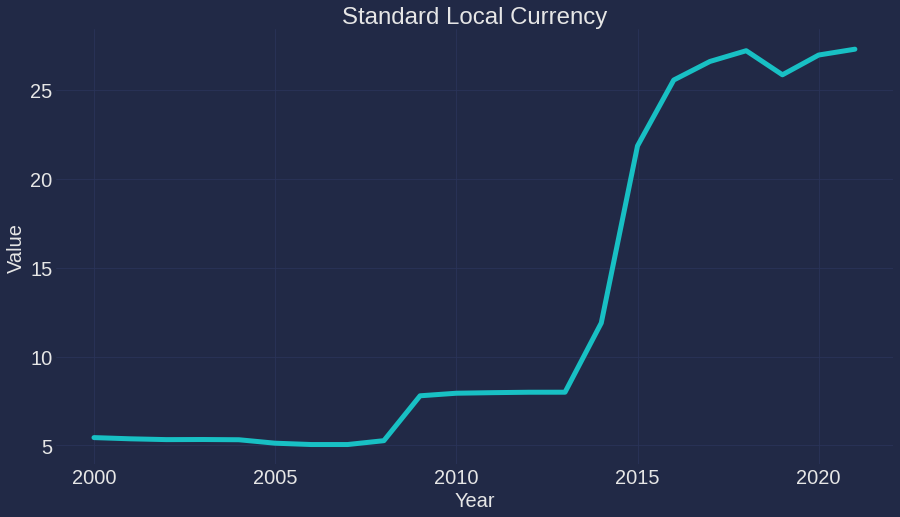

In [77]:
plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.plot(UKR_ER_SLC['Year'], UKR_ER_SLC['Value'], linewidth=5)
plt.title("Standard Local Currency")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Value")
plt.gcf().set_size_inches(15, 8)

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()


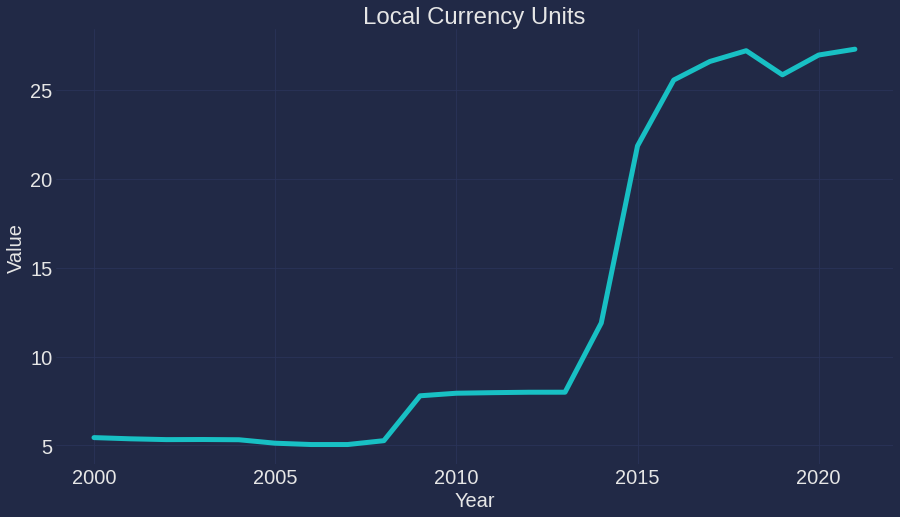

In [78]:
plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.plot(UKR_ER_LCU['Year'], UKR_ER_LCU['Value'], linewidth=5)
plt.title("Local Currency Units")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Value")
plt.gcf().set_size_inches(15, 8)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.show()

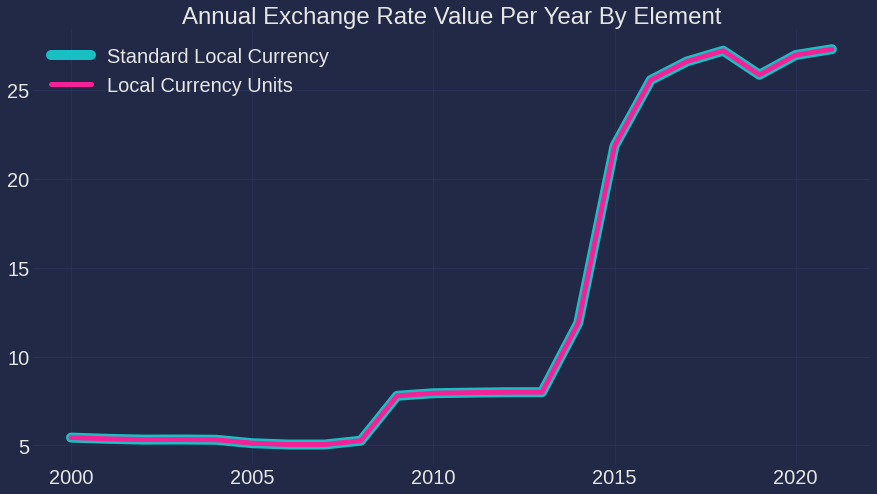

In [79]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.rcParams.update({'font.size': 20})


plt.plot(UKR_ER_SLC['Year'], UKR_ER_SLC['Value'], label = 'Standard Local Currency', linewidth=10)
plt.plot(UKR_ER_LCU['Year'], UKR_ER_LCU['Value'], label = 'Local Currency Units', linewidth = 5)
plt.title('Annual Exchange Rate Value Per Year By Element')
plt.gcf().set_size_inches(15, 8)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.legend()
plt.show()

From the visualization above, it can be seen that the Ukraine experienced a rapid increase in the exchange rate from 2000 to 2020.

#Ukraine Export

In [80]:
data_export = pd.read_csv("https://raw.githubusercontent.com/laurentiaalyssa/Data/main/Exports%20By%20Country%20Product%20to%20World%20in%20US%24%20Thousand%201988-2020.csv", sep=";")
data_export.head(6)

,Reporter Name,Partner Name,Trade Flow,Product Group,Indicator,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,World,Export,All Products,Export (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"375850,935","428902,71","514972,983","570534,007","571404,967","596455,337","831926,7718","884504,4964","870488,5125",NaN
1,Albania,World,Export,All Products,Export (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"1948207,305","1967918,947","2331521,928","2430723,644","1929657,032","1962117,416","2302318,252","2875859,779","2719428,708","2415632,335"
2,Algeria,World,Export,All Products,Export (US$ Thousand),NaN,NaN,NaN,NaN,"11136801,79",...,"73436306,09","71865748,99","65998137,6","60387689,3","34795951,49","29992101,47","35191117,42",NaN,NaN,NaN
3,Andorra,World,Export,All Products,Export (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"114022,713","105949,644","98978,051","95157,70705","89501,93495","96912,95867","117965,6118","129448,151",NaN,NaN
4,Angola,World,Export,All Products,Export (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"66427390,22","70863076,41","67712526,55","58672369,19","33924937,48","28057499,52","34904881,11","42096736,31","34819240,57",NaN
5,Anguila,World,Export,All Products,Export (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data_export = data_export.drop(['Trade Flow', 'Partner Name', 'Indicator','Product Group','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'], axis=1)
data_export2 = data_export.copy()

data_export2 = data_export2[data_export2['Reporter Name'] == 'Ukraine']
data_export2.head()

,Reporter Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
193,Ukraine,"14572550,14","16264734,34","17927432,23","23066845,56","32666131,94","34227973,96","38367609,3","49294389,7","66952306,46",...,"68393034,21","68694495,45","63320468,79","53913302,43","38127039,56","36361032,46","43428391,06","47334679,85","50054402,43","49230799,58"


In [82]:
data = data_export2.T
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Reporter Name to 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   193     22 non-null     object
dtypes: object(1)
memory usage: 908.0+ bytes


In [83]:
arr = np.array([data_export2])
arr
index= [0]
new_arr = np.delete(arr, index)
new_arr

array(['14572550,14', '16264734,34', '17927432,23', '23066845,56',
       '32666131,94', '34227973,96', '38367609,3', '49294389,7',
       '66952306,46', '39695647,59', '51430285,58', '68393034,21',
       '68694495,45', '63320468,79', '53913302,43', '38127039,56',
       '36361032,46', '43428391,06', '47334679,85', '50054402,43',
       '49230799,58'], dtype=object)

In [84]:
value = np.array([14572550.14, 16264734.34, 17927432.23, 23066845.56, 32666131.94,
       34227973.96, 38367609.3, 49294389.7, 66952306.46, 39695647.59,
       51430285.58, 68393034.21, 68694495.45, 63320468.79, 53913302.43,
       38127039.56, 36361032.46, 43428391.06, 47334679.85, 50054402.43,
       49230799.58])
value

array([14572550.14, 16264734.34, 17927432.23, 23066845.56, 32666131.94,
       34227973.96, 38367609.3 , 49294389.7 , 66952306.46, 39695647.59,
       51430285.58, 68393034.21, 68694495.45, 63320468.79, 53913302.43,
       38127039.56, 36361032.46, 43428391.06, 47334679.85, 50054402.43,
       49230799.58])

In [85]:
year_arr = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
year_arr

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

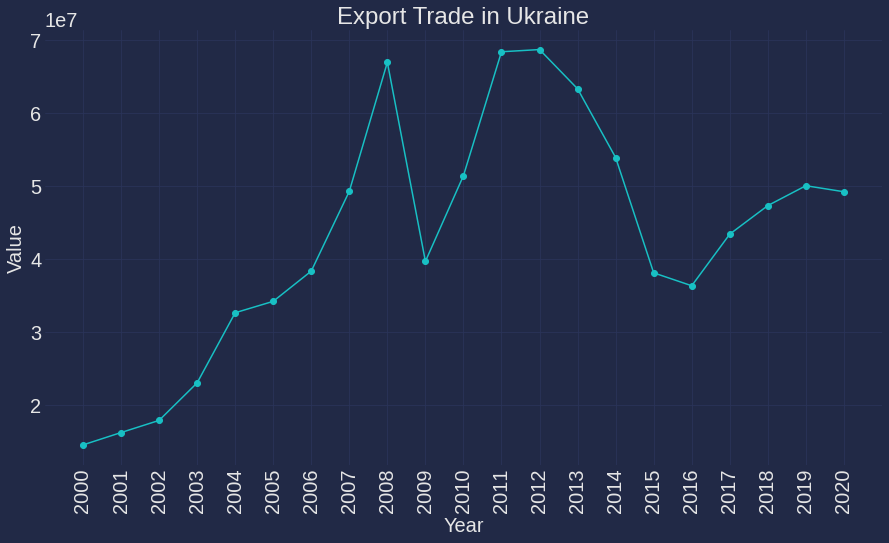

<Figure size 1080x576 with 0 Axes>

In [86]:
plt.plot(year_arr,value,'-o')
plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.gcf().set_size_inches(15, 8)
plt.xlabel("Year")
plt.ylabel("Value") 
plt.xticks(np.arange(2000,2021,1.0), rotation = 90)
plt.title("Export Trade in Ukraine")
plt.figure(figsize = (15,8))
plt.show()

#Ukraine Import

In [87]:
data_import = pd.read_csv("https://raw.githubusercontent.com/laurentiaalyssa/Data/main/Imports%20By%20Country%20Product%20from%20World%20in%20US%24%20Thousand%201988-2020.csv", sep=";")
data_import.head(6)

,Reporter Name,Partner Name,Trade Flow,Product Group,Indicator,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,World,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"6390310,947","6204984,101","8554413,749","7697178,17","7722865,049","6534140,413","7792600,112","7406590,325","8568013,877",NaN
1,Albania,World,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"5395853,069","4879829,648","4880593,254","5229972,238","4320219,367","4669289,913","5282117,403","5941286,949","5908003,38","5410943,447"
2,Algeria,World,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,"8647816,192",...,"47219730,32","50369390,59","54909973,27","58618080,19","51803071,09","47090683,59","46053015,99",NaN,NaN,NaN
3,Andorra,World,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"1617690,977","1417733,795","1487194,105","1556048,524","1293752,873","1354095,937","1478292,965","1609394,249",NaN,NaN
4,Angola,World,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,"20790996,04","28722984,06","26756062,99","28753499,33","21549256,53","14347710,5","15462313,48","16036479,58","14160145,46",NaN
5,Anguila,World,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
data_import = data_import.drop(['Trade Flow', 'Partner Name', 'Indicator','Product Group','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'], axis=1)
data_import2 = data_import.copy()

data_import2 = data_import2[data_import2['Reporter Name'] == 'Ukraine']
data_import2.head()

,Reporter Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
194,Ukraine,"13956027,19","15775092,66","16975884,13","23020437,66","28996784,33","36121997,44","45021620,6","60600580,94","85448380,85",...,"82607537,26","84656666,98","76986012,5","54381409,09","37516153,22","39249626,35","49439155,77","57187093,43","60799689,21","53674668,69"


In [89]:
arr = np.array([data_import2])
arr
index= [0]
new_arr = np.delete(arr, index)
new_arr


array(['13956027,19', '15775092,66', '16975884,13', '23020437,66',
       '28996784,33', '36121997,44', '45021620,6', '60600580,94',
       '85448380,85', '45412943,89', '60737134,59', '82607537,26',
       '84656666,98', '76986012,5', '54381409,09', '37516153,22',
       '39249626,35', '49439155,77', '57187093,43', '60799689,21',
       '53674668,69'], dtype=object)

In [90]:
import_value = np.array([13956027.19, 15775092.66, 16975884.13, 23020437.66, 28996784.33,
       36121997.44, 45021620.6, 60600580.94, 85448380.85, 45412943.89,
       60737134.59, 82607537.26, 84656666.98, 76986012.5, 54381409.09,
       37516153.22, 39249626.35, 49439155.77, 57187093.43, 60799689.21,
       53674668.69])
import_value

array([13956027.19, 15775092.66, 16975884.13, 23020437.66, 28996784.33,
       36121997.44, 45021620.6 , 60600580.94, 85448380.85, 45412943.89,
       60737134.59, 82607537.26, 84656666.98, 76986012.5 , 54381409.09,
       37516153.22, 39249626.35, 49439155.77, 57187093.43, 60799689.21,
       53674668.69])

In [91]:
import_year_arr = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
import_year_arr

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

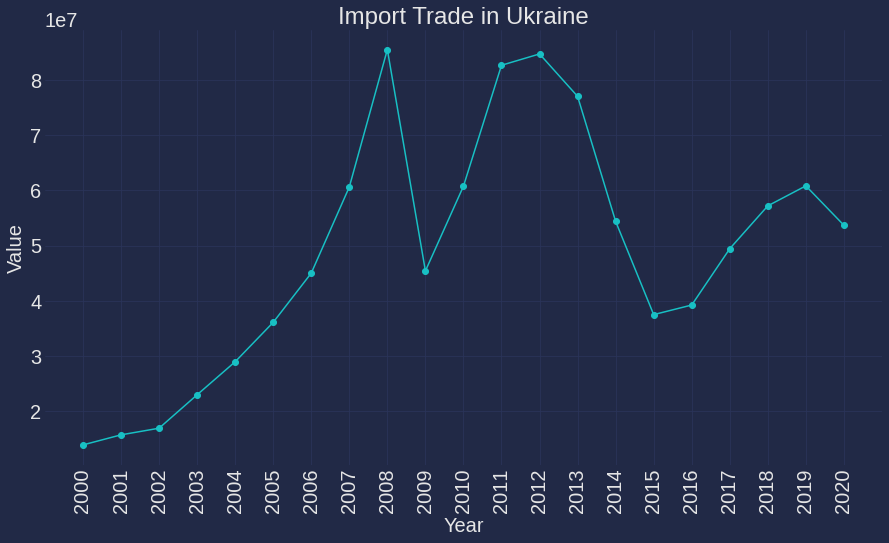

<Figure size 1080x576 with 0 Axes>

In [92]:
plt.plot(import_year_arr, import_value,'-o')
plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.gcf().set_size_inches(15, 8)
plt.xlabel("Year")
plt.ylabel("Value") 
plt.xticks(np.arange(2000,2021,1.0), rotation = 90)
plt.title("Import Trade in Ukraine")
plt.figure(figsize = (15,8))
plt.show()

#Global Peace Index Dataset

In [93]:
Peace_Index = pd.read_csv("https://raw.githubusercontent.com/belindamutiaraaaaa/data/main/Peace_Index.csv")

In [94]:
Peace_Index.head()

,Country,Rank,Score
0,Iceland,1,1107
1,New Zealand,2,1269
2,Ireland,3,1288
3,Denmark,4,1296
4,Austria,5,1300


In [95]:
Peace_Index.tail()

,Country,Rank,Score
158,South Sudan,159,3184
159,Russia,160,3275
160,Syria,161,3356
161,Yemen,162,3394
162,Afghanistan,163,3554


In [96]:
Peace_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  163 non-null    object
 1   Rank     163 non-null    object
 2   Score    163 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


From the output above it can be seen:
1. No missing values in any column
2. There is only one data type that is string
3. The data types of the Rank still not appropriate, Rank should have an integer data type.

In [97]:
duplicate_PI = Peace_Index[Peace_Index.duplicated()]
duplicate_PI

,Country,Rank,Score


There is no duplication in Peace Index dataset

Some values in the value column do not match the integer standard, for example there is a value "81=" we should change it to 81 and so on for the same case.

In [98]:
Peace_Index.loc[Peace_Index["Rank"] == "48=", "Rank"] = "48"

In [99]:
Peace_Index.loc[Peace_Index["Rank"] == "62=", "Rank"] = "62"

In [100]:
Peace_Index.loc[Peace_Index["Rank"] == "65=", "Rank"] = "65"

In [101]:
Peace_Index.loc[Peace_Index["Rank"] == "75=", "Rank"] = "75"

In [102]:
Peace_Index.loc[Peace_Index["Rank"] == "81=", "Rank"] = "81"

In [103]:
Peace_Index.loc[Peace_Index["Rank"] == "86=", "Rank"] = "86"

In [104]:
data_types_dict = {'Rank': int}
Peace_Index = Peace_Index.astype(data_types_dict)

In [105]:
Peace_Index["Rank"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163])

Now the Rank column is clean from input errors!

## Visualization

###### Global Peace Index Dashboard
https://public.tableau.com/app/profile/belinda.mutiara/viz/WorldPeaceIndex2022/Dashboard1?publish=yes

#GDP Growth

In [106]:
GDP = pd.read_csv("https://raw.githubusercontent.com/laurentiaalyssa/Data/main/ukraine_gdp.csv", sep=';')

In [107]:
GDP.head()

,Year,GDP
0,2000,5.09
1,2001,8.08
2,2002,5.03
3,2003,9.05
4,2004,11.08


In [108]:
GDP.tail()

,Year,GDP
18,2018,3.05
19,2019,3.02
20,2020,-3.80
21,2021,3.04
22,2022,-35.00


In [109]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    23 non-null     int64  
 1   GDP     23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


From the output above it can be seen that:
1. There is no missing value
2. There are 2 kinds of data types: integer which is owned by the Year column and float which is owned by GDP column
3. Each column already has a good name and data type

In [110]:
duplicate_GDP = GDP[GDP.duplicated()]
duplicate_GDP

,Year,GDP


There is no duplication in Ukrain GDP dataset

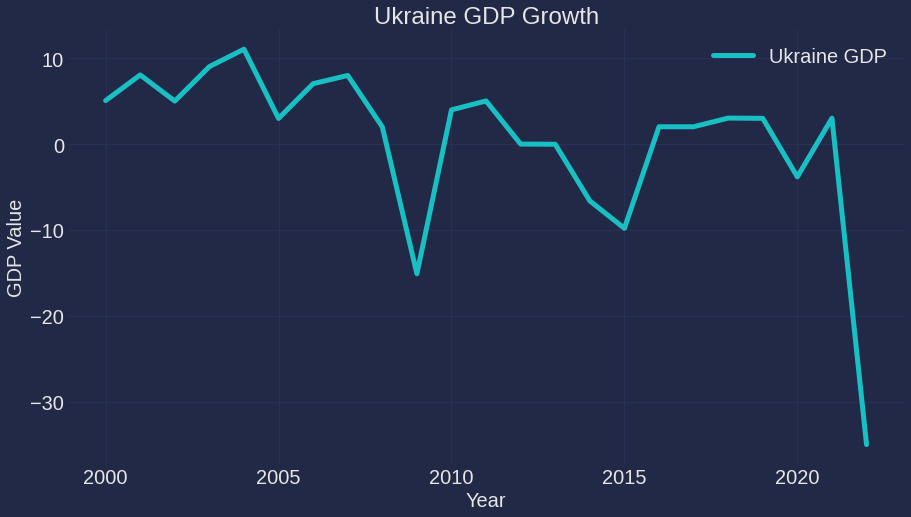

In [111]:
plt.plot(GDP["Year"],GDP["GDP"], label= "Ukraine GDP", linewidth=5)

plt.rcParams.update({'font.size': 20})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.title("Ukraine GDP Growth")
plt.xlabel("Year", fontsize=20)
plt.ylabel("GDP Value")
plt.gcf().set_size_inches(15, 8)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.legend()
plt.show()